In [84]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/test-file/tested.csv


In [85]:
df = pd.read_csv('/kaggle/input/test-file/tested.csv')

In [86]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [87]:
df.shape

(418, 12)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [89]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [91]:
num_cols = df[['Age','SibSp','Parch','Fare']]
cat_cols = df[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

In [92]:
num_cols

,Age,SibSp,Parch,Fare
0,34.5,0,0,7.8292
1,47.0,1,0,7.0000
2,62.0,0,0,9.6875
3,27.0,0,0,8.6625
4,22.0,1,1,12.2875
...,...,...,...,...
413,NaN,0,0,8.0500
414,39.0,0,0,108.9000
415,38.5,0,0,7.2500
416,NaN,0,0,8.0500


In [93]:
cat_cols

,Survived,Pclass,Sex,Ticket,Cabin,Embarked
0,0,3,male,330911,NaN,Q
1,1,3,female,363272,NaN,S
2,0,2,male,240276,NaN,Q
3,0,3,male,315154,NaN,S
4,1,3,female,3101298,NaN,S
...,...,...,...,...,...,...
413,0,3,male,A.5. 3236,NaN,S
414,1,1,female,PC 17758,C105,C
415,0,3,male,SOTON/O.Q. 3101262,NaN,S
416,0,3,male,359309,NaN,S


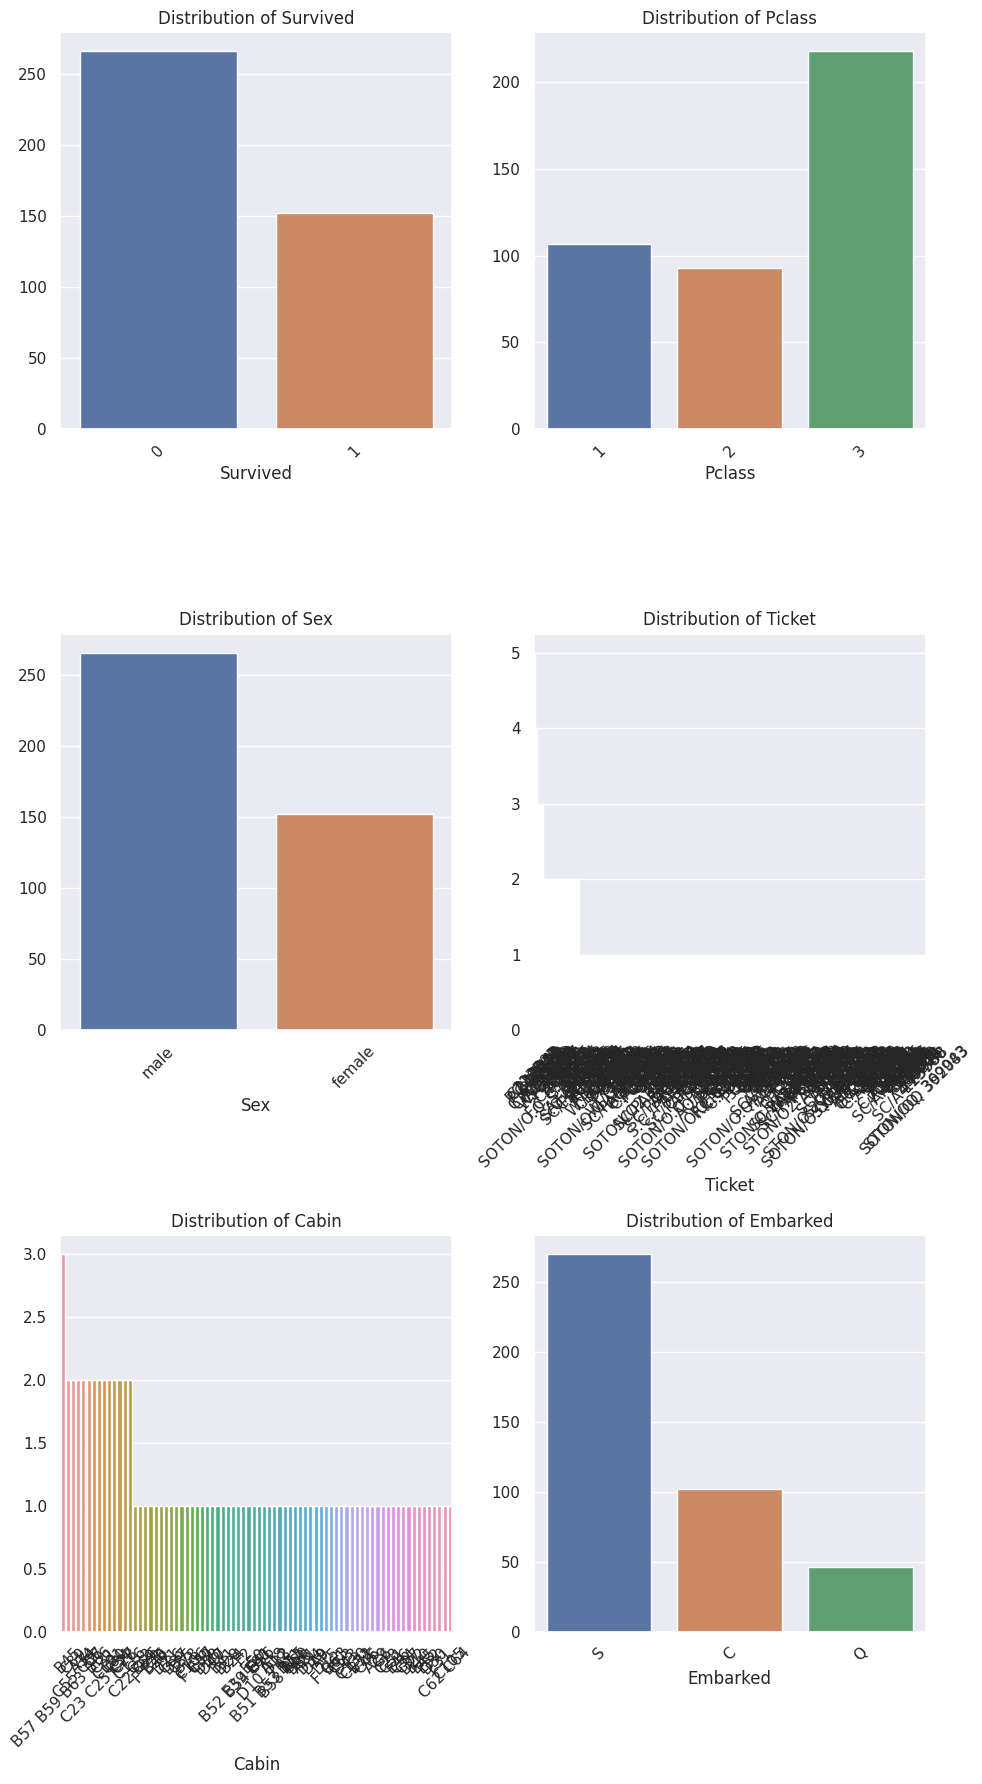

In [94]:
plt.figure(figsize=(10, len(cat_cols.columns) * 3))  # Adjust the figure size based on the number of subplots

for idx, col in enumerate(cat_cols.columns):
    value_counts = cat_cols[col].value_counts()
    plt.subplot((len(cat_cols.columns) + 1) // 2, 2, idx + 1)  # Use idx to manage the subplot positioning
    sns.barplot(x=value_counts.index, y=value_counts.values)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)  # Rotate x-axis labels if needed for readability

plt.tight_layout()
plt.show()

# For better visualisation of ticket and cabin columns

In [95]:
df['cabin_num'] = df['Cabin'].str.extract(r'(\d+)') # captures the numerical part
df['cabin_cat'] = df['Cabin'].str.extract(r'([A-Z])') 
df = df.drop(columns='Cabin')

df['ticket_num'] = df['Ticket'].str.extract(r'(\d+)') # captures the numerical part
df['ticket_cat'] = df['Ticket'].str.extract(r'([A-Za-z]+)')
df = df.drop(columns='Ticket')

In [96]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,cabin_num,cabin_cat,ticket_num,ticket_cat
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,NaN,NaN,330911,NaN
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,NaN,NaN,363272,NaN
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,NaN,NaN,240276,NaN
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,NaN,NaN,315154,NaN
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,NaN,NaN,3101298,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,8.0500,S,NaN,NaN,5,A
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C,105,C,17758,PC
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,S,NaN,NaN,3101262,SOTON
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,8.0500,S,NaN,NaN,359309,NaN


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Fare         417 non-null    float64
 9   Embarked     418 non-null    object 
 10  cabin_num    89 non-null     object 
 11  cabin_cat    91 non-null     object 
 12  ticket_num   418 non-null    object 
 13  ticket_cat   122 non-null    object 
dtypes: float64(2), int64(5), object(7)
memory usage: 45.8+ KB


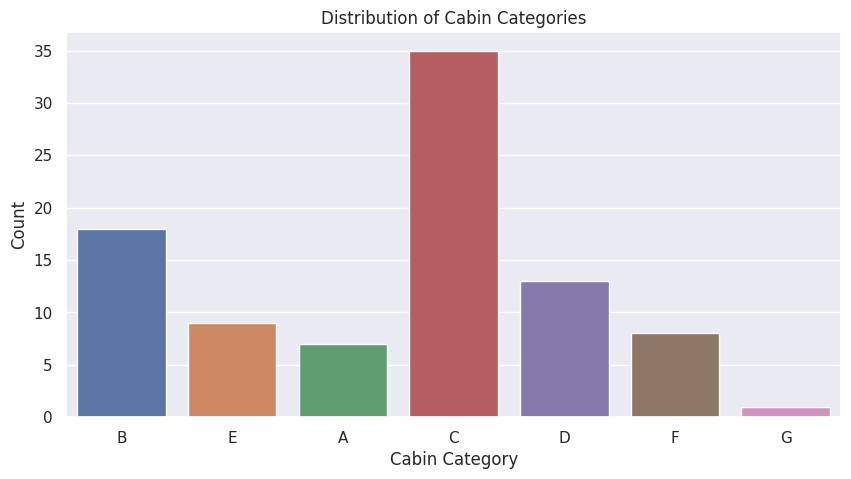

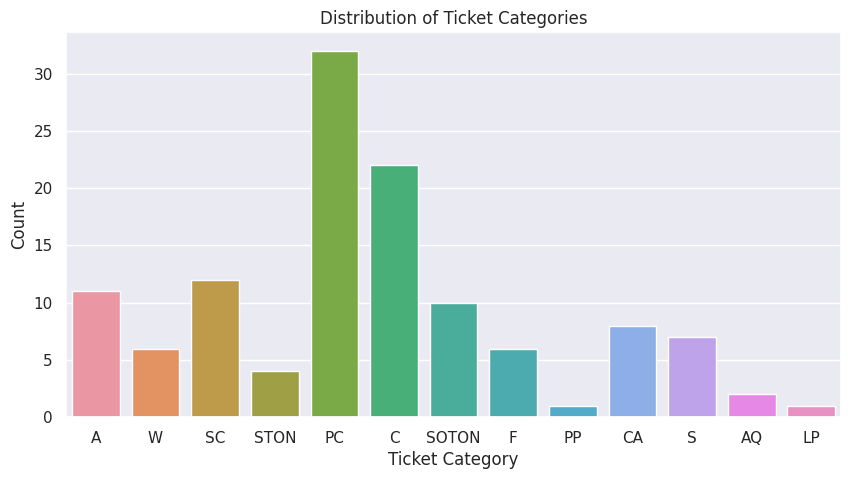

In [98]:
# Plot the distribution of cabin categories
plt.figure(figsize=(10, 5))
sns.countplot(x='cabin_cat', data=df)
plt.title('Distribution of Cabin Categories')
plt.xlabel('Cabin Category')
plt.ylabel('Count')
plt.show()

# Plot the distribution of ticket categories
plt.figure(figsize=(10, 5))
sns.countplot(x='ticket_cat', data=df)
plt.title('Distribution of Ticket Categories')
plt.xlabel('Ticket Category')
plt.ylabel('Count')
plt.show()